In [35]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('pulsar_data_train.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [37]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [38]:
df.columns = ['Mean_IP','Std_IP','Exc_kurt_IP','Skewness_IP','Mean_DM_SNR_curve','Std_DM_SNR_curve','Exc_kurt_DM_SNR_curve','Skewness_DM_SNR_curve','target_class']

In [39]:
df.isnull().sum()

Mean_IP                     0
Std_IP                      0
Exc_kurt_IP              1735
Skewness_IP                 0
Mean_DM_SNR_curve           0
Std_DM_SNR_curve         1178
Exc_kurt_DM_SNR_curve       0
Skewness_DM_SNR_curve     625
target_class                0
dtype: int64

In [40]:
df.dropna(axis=0,inplace=True)

In [41]:
df.isnull().sum()

Mean_IP                  0
Std_IP                   0
Exc_kurt_IP              0
Skewness_IP              0
Mean_DM_SNR_curve        0
Std_DM_SNR_curve         0
Exc_kurt_DM_SNR_curve    0
Skewness_DM_SNR_curve    0
target_class             0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df['target_class'].value_counts()

0.0    8423
1.0     850
Name: target_class, dtype: int64

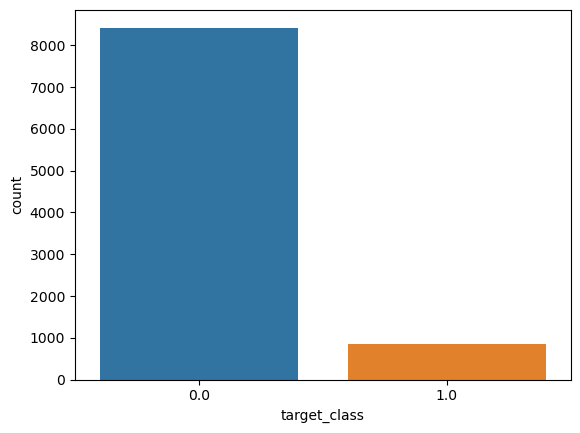

In [44]:
sns.countplot(x=df['target_class'],data=df)
plt.show()

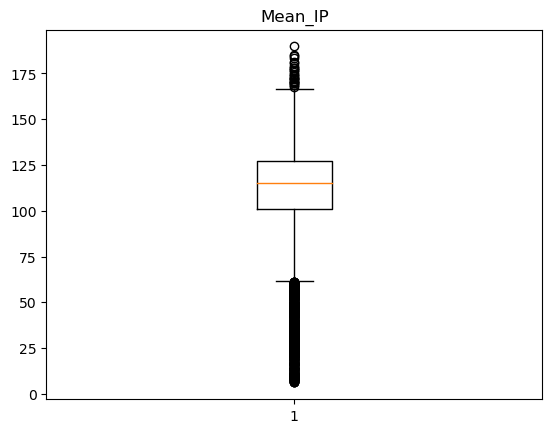

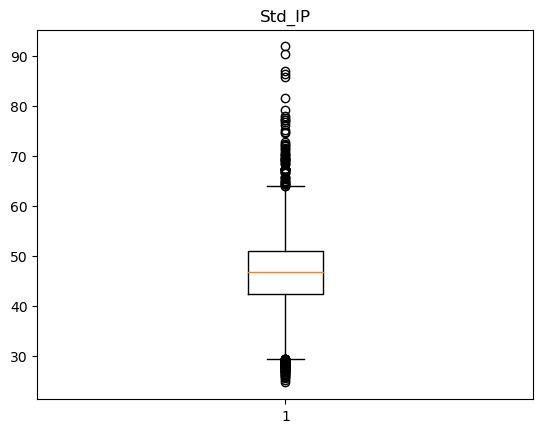

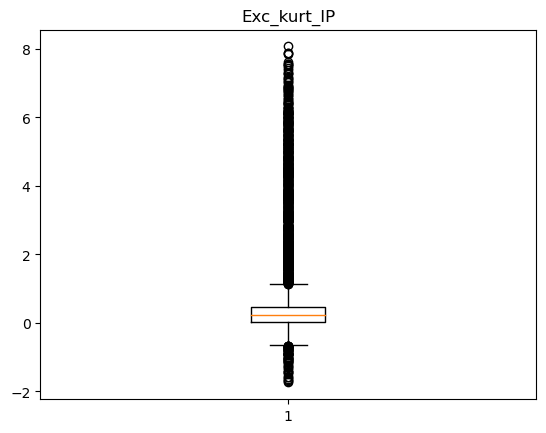

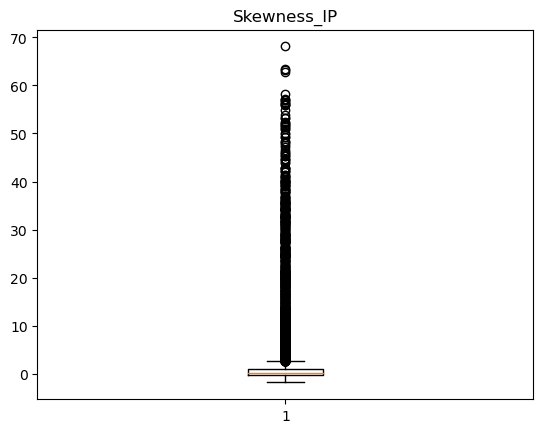

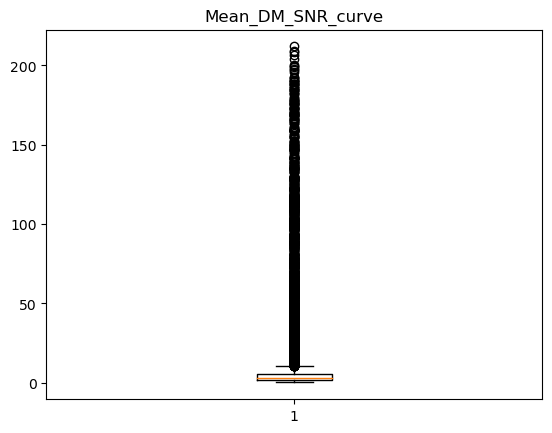

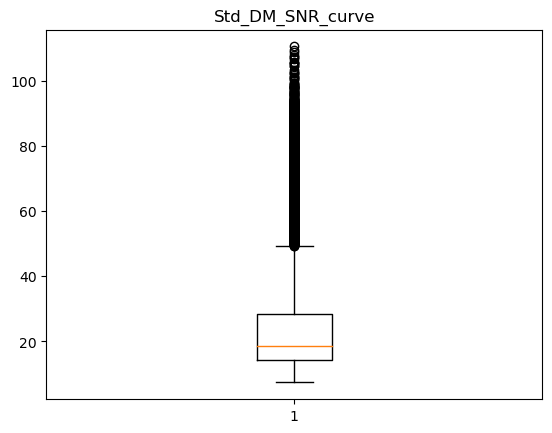

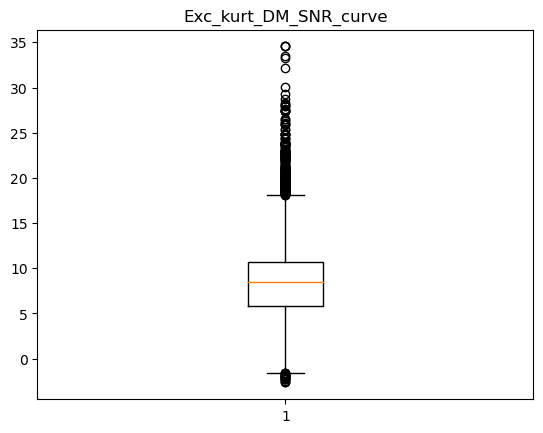

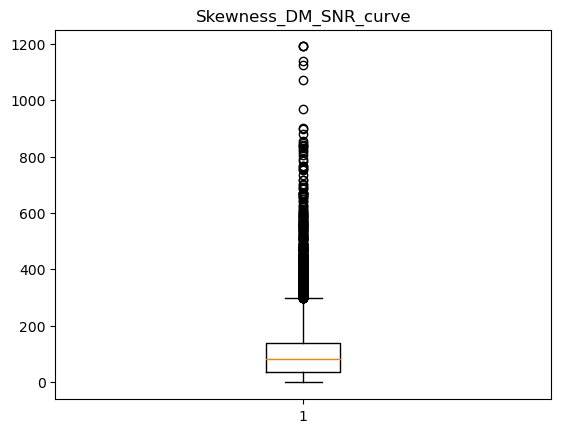

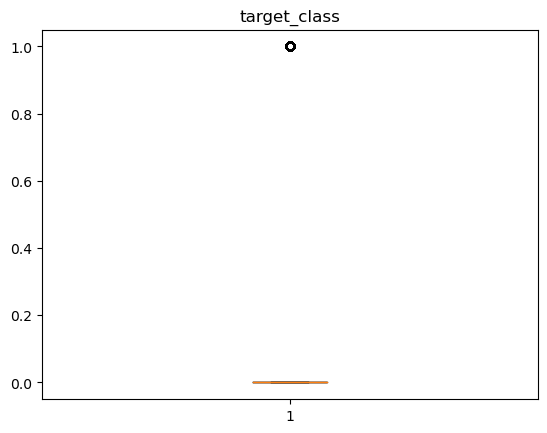

In [45]:
for col in df.columns:
    plt.title(col)
    plt.boxplot(df[col])
    plt.show()

### Removing outiers

In [46]:
lis = ['Mean_IP','Std_IP','Exc_kurt_IP','Skewness_IP','Mean_DM_SNR_curve','Std_DM_SNR_curve','Exc_kurt_DM_SNR_curve','Skewness_DM_SNR_curve']
for col in lis:
    print(col)
    mean = df[col].mean()
    std  = df[col].std()
 
    # Calculate the lower and upper bounds
    lower_bound = mean - std*2
    upper_bound = mean + std*2

    print('Lower Bound :',lower_bound)
    print('Upper Bound :',upper_bound)

    # Drop the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}.")

Mean_IP
Lower Bound : 59.76093944389451
Upper Bound : 162.50656096050537
Outliers removed from Mean_IP.
Std_IP
Lower Bound : 34.73950816177242
Upper Bound : 59.498118126741815
Outliers removed from Std_IP.
Exc_kurt_IP
Lower Bound : -0.5285467877502924
Upper Bound : 1.0314777198012024
Outliers removed from Exc_kurt_IP.
Skewness_IP
Lower Bound : -1.2039075374625905
Upper Bound : 1.8297637247260607
Outliers removed from Skewness_IP.
Mean_DM_SNR_curve
Lower Bound : -32.675745966938756
Upper Bound : 47.85541768858496
Outliers removed from Mean_DM_SNR_curve.
Std_DM_SNR_curve
Lower Bound : -0.9775915432940359
Upper Bound : 42.16333397781791
Outliers removed from Std_DM_SNR_curve.
Exc_kurt_DM_SNR_curve
Lower Bound : 2.4413237476784992
Upper Bound : 16.887093099468373
Outliers removed from Exc_kurt_DM_SNR_curve.
Skewness_DM_SNR_curve
Lower Bound : -27.587406010744758
Upper Bound : 245.94838150010827
Outliers removed from Skewness_DM_SNR_curve.


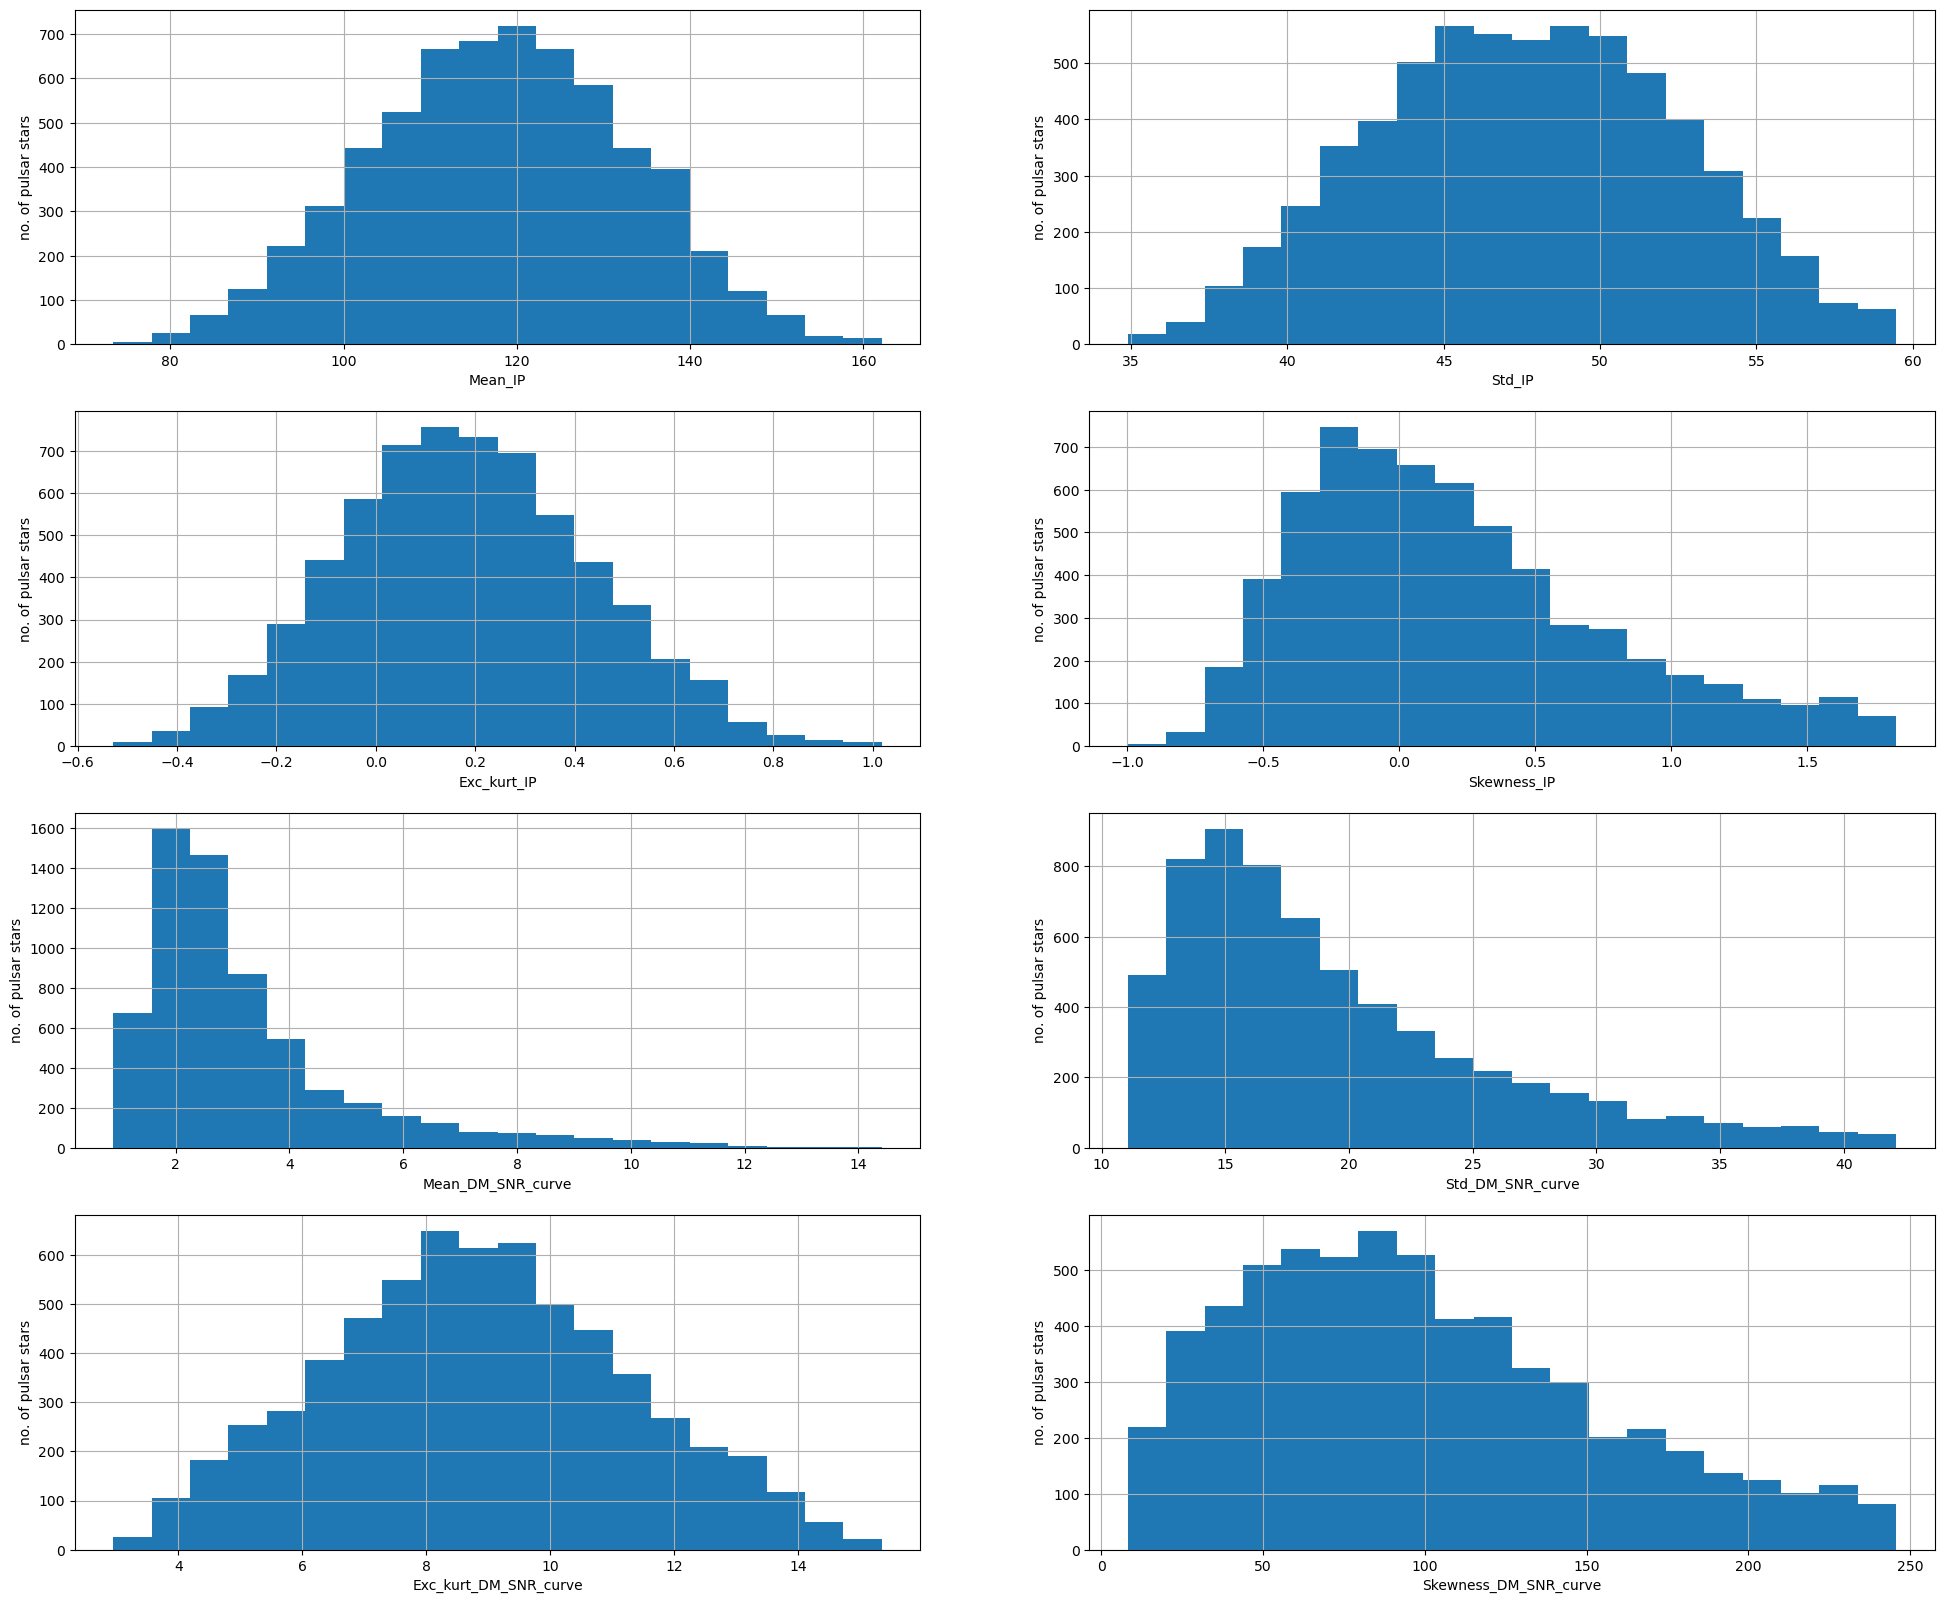

In [47]:
plt.figure(figsize=(24,20))
for i in  range(1,len(lis)+1):
    plt.subplot(4,2,i)
    fig = df[lis[i-1]].hist(bins=20)
    fig.set_xlabel(lis[i-1])
    fig.set_ylabel("no. of pulsar stars")

# Splitting the dataset

In [55]:
x=df.drop(['target_class'],axis=1)
y = df['target_class']

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [57]:
x_train.shape

(4420, 8)

#### Min Max Scaler

In [58]:
cols = x_train.columns
cols

Index(['Mean_IP', 'Std_IP', 'Exc_kurt_IP', 'Skewness_IP', 'Mean_DM_SNR_curve',
       'Std_DM_SNR_curve', 'Exc_kurt_DM_SNR_curve', 'Skewness_DM_SNR_curve'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [61]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [64]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters:',accuracy_score(y_test, y_pred)*100)

Model accuracy score with default hyperparameters: 98.99736147757255


In [63]:
svc = SVC(C=100.0)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0:', accuracy_score(y_test, y_pred)*100)

Model accuracy score with rbf kernel and C=100.0: 98.94459102902374


In [65]:
svc = SVC(C=1000.0)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with linear kernel and C=1000.0: 97.6781


In [70]:
svc = SVC(kernel='linear',C=1.0)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with linear kernel and C=1.0: 98.9974


In [69]:
svc=SVC(kernel='linear', C=100.0) 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with linear kernel and C=100.0 : 98.9974


In [71]:
svc=SVC(kernel='linear', C=1000.0) 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with linear kernel and C=1000.0 : 98.9974


In [73]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1876    0]
 [  19    0]]

True Positives(TP) =  1876

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  19


<Axes: >

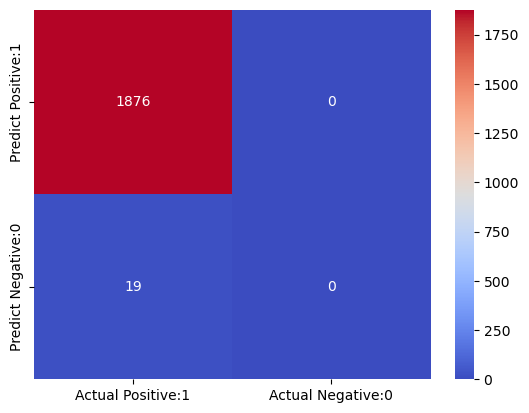

In [79]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1876
         1.0       0.00      0.00      0.00        19

    accuracy                           0.99      1895
   macro avg       0.49      0.50      0.50      1895
weighted avg       0.98      0.99      0.98      1895



In [81]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [82]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9900


In [83]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0100


In [84]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [85]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9900


In [86]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9900


In [87]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : nan


In [88]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan


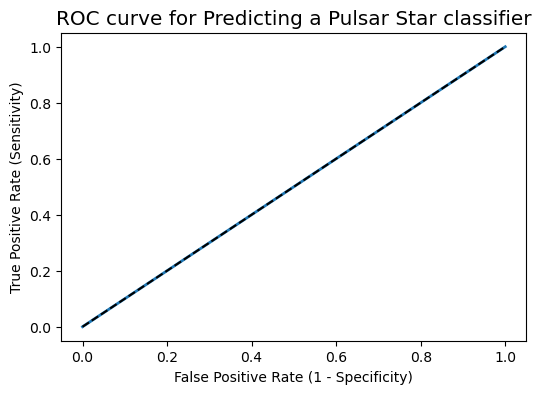

In [90]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()